In [104]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Problem Statement:  Predicting domestic flight delay 


### Breakdown of problem:
#### 1. Getting data from flightradar (web scraping)
#### 2.  Data preprocessing / Manipulation
#### 3. performing EDA
#### 4. prediction 

# Establishing MongoDB connection

In [48]:
from pymongo import MongoClient
client=MongoClient()
db=client.flight_data
collection_1=db.flight_data_collection
import datetime 
import pandas as pd 
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def from_unix_timestamp(val):
     #print("Date=", val)
     if (val is None):
         return datetime.datetime.fromtimestamp(0)
     if(val!=0):
      return datetime.datetime.fromtimestamp(val)

height has been deprecated.



In [105]:
#print(collection_1.find()[0])


In [2]:
from geopy.distance import vincenty
#a=x['airport']["origin"]['position']['latitude']
#b=x['airport']['origin']['position']['longitude']
#m=(a,b)
#c=x['airport']['destination']['position']['latitude']
#d=x['airport']['destination']['position']['longitude']
#n=(c,d)
#z=vincenty(m,n)
#print(type(z))
#print(z)


In [3]:
flight_number=[]
status_text=[]
origin=[]
destination=[]
scheduled_departure=[]
scheduled_arrival=[]
real_departure=[]
real_arrival=[]
estimated_departure=[]
estimated_arrival=[]
duration=[]
timestamp=[]
for item in collection_1.find()[0:50]:
    if item['identification']['number']['default']==None:
        flight_number.append("None")
    else:
        flight_number.append(item['identification']['number']['default'])
    if item['status']['text']==None:
        status_text.append("None")
    else:
        status_text.append(item['status']['text'])
    if item['airport']['origin']==None:
        origin.append("None")
    else:
        origin.append(item['airport']['origin']['name'])
    if item['airport']['destination']==None:
        destination.append("None")
    else:
        destination.append(item['airport']['destination']['name'])
    if item['time']['estimated']['arrival']==None:
        estimated_arrival.append("None")
    else:
        estimated_arrival.append(item['time']['estimated']['arrival'])
    if item['time']['estimated']['departure']==None:
        estimated_departure.append("None")
    else:
        estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
    if item['time']['scheduled']['arrival']==None:
        scheduled_arrival.append('None')
    else:
        scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
    if item['time']['scheduled']['departure']==None:
        scheduled_departure.append('None')
    else:
        scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
    if item['time']['real']['arrival']==None:
        real_arrival.append('None')
    else:
        real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
    if item['time']['real']['departure']==None:
        real_departure.append('None')
    else:
        real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
    if item['time']['other']['duration']==None:
        duration.append("None")
    else:
        duration.append(item['time']['other']['duration'])
    timestamp.append(item['_id'].generation_time)
        

In [84]:
import pandas as pd 

df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration})

df=df[["timestamp","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration"]]

# Preprocessing function

In [2]:
#Function for extracting useful information from the database 

def extract(collection):
    from geopy.distance import vincenty
    import pandas as pd 
    flight_number=[]
    status_text=[]
    origin=[]
    destination=[]
    scheduled_departure=[]
    scheduled_arrival=[]
    real_departure=[]
    real_arrival=[]
    estimated_departure=[]
    estimated_arrival=[]
    duration=[]
    timestamp=[]
    distance_travelled=[]
    country_origin=[]
    country_destination=[]
    airline_name=[]
    registration=[]
    model=[]
    model_text=[]
    geo_coord_origin=[]
    geo_coord_destination=[]
    for item in collection:
        if item['airport']['origin']==None or item['airport']['destination']==None:
            distance_travelled.append("0 km")
            geo_coord_origin.append("None")
            geo_coord_destination.append("None")
        else:
            n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            distance_travelled.append((vincenty(m,n)))
            geo_coord_origin.append(m)
            geo_coord_destination.append(n)
            #country.append(item['airport']['origin']['position']['country']['name'])
            
        if item['identification']['number']['default']==None:
            flight_number.append("None")
        else:
            flight_number.append(item['identification']['number']['default'])
        if item['status']['text']==None:
            status_text.append("None")
        else:
            status_text.append(item['status']['text'])
        if item['airport']['origin']==None:
            origin.append("None")
            country_origin.append("None")
            #distance_travelled.append('None')
        else:
            origin.append(item['airport']['origin']['name'])
            country_origin.append(item['airport']['origin']['position']['country']['name'])
            #m=(item['airport']["origin"]['position']['latitude'],item['airport']['origin']['position']['longitude'])
            #n=(item['airport']['destination']['position']['latitude'],item['airport']['destination']['position']['longitude'])
            #distance_travelled.append((vincenty(m,n)))
            
        if item['airport']['destination']==None:
            destination.append("None")
            country_destination.append("None")
        else:
            destination.append(item['airport']['destination']['name'])
            country_destination.append(item['airport']['destination']['position']['country']['name'])
        if item['time']['estimated']['arrival']==None:
            estimated_arrival.append("None")
        else:
            estimated_arrival.append(item['time']['estimated']['arrival'])
        if item['time']['estimated']['departure']==None:
            estimated_departure.append("None")
        else:
            estimated_departure.append(from_unix_timestamp(item['time']['estimated']['departure']))
        if item['time']['scheduled']['arrival']==None:
            scheduled_arrival.append('None')
        else:
            scheduled_arrival.append(from_unix_timestamp(item['time']['scheduled']['arrival']))
        if item['time']['scheduled']['departure']==None:
            scheduled_departure.append('None')
        else:
            scheduled_departure.append(from_unix_timestamp(item['time']['scheduled']['departure']))
        if item['time']['real']['arrival']==None:
            real_arrival.append('None')
        else:
            real_arrival.append(from_unix_timestamp(item['time']['real']['arrival']))
        if item['time']['real']['departure']==None:
            real_departure.append('None')
        else:
            real_departure.append(from_unix_timestamp(item['time']['real']['departure']))
        # New added code
        if item['aircraft']['registration']==None:
            registration.append("None")
            model.append("None") # new code on 29th march
            model_text.append("None") #new code on 29th march 
        else:
            registration.append(item['aircraft']['registration'])
            model.append(item['aircraft']['model']['code'])      #new code
            model_text.append(item['aircraft']['model']['text']) #new code
        if item['airline']==None or item['airline']['name']==None:
            airline_name.append("None")
        else:
            airline_name.append(item['airline']['name'])
        if item['time']['other']['duration']==None:
            duration.append("None")
        else:
            duration.append(item['time']['other']['duration'])
        timestamp.append(item['_id'].generation_time)
        
    df=pd.DataFrame({"timestamp":timestamp,"origin":origin,"destination":destination,"estimated_arrival":estimated_arrival,"estimated_departure":
                estimated_departure,"real_arrival":real_arrival,"real_departure":real_departure,"scheduled_arrival":scheduled_arrival,"scheduled_departure":
                scheduled_departure,"flight_number":flight_number,"status":status_text,"duration":duration,"distance_travelled":distance_travelled,
                    "country_origin":country_origin,"country_dest":country_destination,"reg":registration,
                     "airline_name":airline_name,"model":model,"model_text":model_text,"geo_coord_origin":geo_coord_origin,
                     "geo_coord_dest":geo_coord_destination})

    df=df[["timestamp","reg","airline_name","model","model_text","country_origin","country_dest","flight_number","origin","destination","scheduled_departure","scheduled_arrival","estimated_departure","estimated_arrival",
      "real_departure","real_arrival","status","duration","distance_travelled","geo_coord_origin","geo_coord_dest"]]
    
    return df
        
    

In [3]:
import time

t0 = time.time()
#db.getCollection('flight_data_collection').find({"airline.name":"Vistara"})
k=extract(collection_1.find())
t1 = time.time()

total = t1-t0
print(total)

317.03713369369507


In [3]:
#k=extract(collection_1.find())

In [5]:
#k.to_csv("flight_7th_june.csv",sep=',')
print("Done")

Done


In [90]:
#type(k.to_dict('records'))


## Data preprocessing - removing rows with missing values

#####   we are excluding all those data points for which  there is "None" value  , as they are irrelevent for analysis.

In [5]:
data=k[k.scheduled_arrival!="None"]
data=data[data.real_arrival!="None"]
data=data[data.real_departure!='None']
data=data[data.scheduled_departure!='None']


In [6]:
new_data=data.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status","country_origin","country_dest","reg","airline_name","model","model_text"])

In [119]:
new_data.head(2)

,timestamp,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled,geo_coord_origin,geo_coord_dest,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep,month
7,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-03-01 06:25:00,2017-03-01 08:25:00,None,None,2017-03-01 06:31:37,2017-03-01 08:03:00,Landed 08:03,5524,1082.7558529029552 km,"(17.254, 78.431)","(26.76059, 80.889328)",-22.0,6.0,6,Wednesday,1,3
8,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-28 21:00:00,2017-02-28 22:55:00,None,None,2017-02-28 20:56:07,2017-02-28 22:31:00,Landed 22:32,5787,1082.7558529029552 km,"(26.76059, 80.889328)","(17.254, 78.431)",-24.0,-4.0,21,Tuesday,28,2


In [9]:
# writing to csv , uncomment the code for the same 
#new_data.to_csv("domestic_flight_data_7th_June.csv")
#print("Written to csv")

In [9]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
model                                                             object
model_text                                                        object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                               object
scheduled_arrival                                                 object
estimated_departure                                               object
estimated_arrival                                  

In [10]:
new_data["scheduled_departure"]=pd.to_datetime(new_data.scheduled_departure)
new_data['scheduled_arrival']=pd.to_datetime(new_data.scheduled_arrival)
new_data['real_arrival']=pd.to_datetime(new_data.real_arrival)
new_data['real_departure']=pd.to_datetime(new_data.real_departure)

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [11]:
new_data.dtypes

timestamp              datetime64[ns, <bson.tz_util.FixedOffset objec...
reg                                                               object
airline_name                                                      object
model                                                             object
model_text                                                        object
country_origin                                                    object
country_dest                                                      object
flight_number                                                     object
origin                                                            object
destination                                                       object
scheduled_departure                                       datetime64[ns]
scheduled_arrival                                         datetime64[ns]
estimated_departure                                               object
estimated_arrival                                  

In [12]:
new_data["arrival_delay"]=(new_data['real_arrival']-new_data['scheduled_arrival']).astype('timedelta64[m]')
new_data['departure_delay']=(new_data['real_departure']-new_data['scheduled_departure']).astype('timedelta64[m]')

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
new_data.shape

(302861, 23)

In [63]:
new_data["hour_dep"]=new_data.scheduled_departure.dt.hour
new_data["weekday_dep"]=new_data.scheduled_departure.dt.weekday_name
new_data["day_of_month_dep"]=new_data.scheduled_departure.dt.day
new_data["month"]=new_data.scheduled_departure.dt.month


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### Duration of collected dataset 

In [64]:
print("MAXIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.max())
print("\n")
print("MINIMUM TIMESTAMP IN DATASET:")
print(new_data.scheduled_departure.min())

MAXIMUM TIMESTAMP IN DATASET:
2017-06-20 12:50:00


MINIMUM TIMESTAMP IN DATASET:
2017-02-22 00:55:00


In [65]:
#Shape of datafarme
new_data.shape
#new_data.to_csv("flightdata_8th_May.csv")

(302861, 27)

In [66]:
new_data.columns

Index(['timestamp', 'reg', 'airline_name', 'model', 'model_text', 'country_origin', 'country_dest', 'flight_number', 'origin', 'destination', 'scheduled_departure', 'scheduled_arrival', 'estimated_departure', 'estimated_arrival', 'real_departure', 'real_arrival', 'status', 'duration', 'distance_travelled', 'geo_coord_origin', 'geo_coord_dest', 'arrival_delay', 'departure_delay', 'hour_dep', 'weekday_dep', 'day_of_month_dep', 'month'], dtype='object')

In [67]:
new_data[(new_data.country_origin!="India")&(new_data.airline_name=="IndiGo")]

,timestamp,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled,geo_coord_origin,geo_coord_dest,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep,month
42,2017-03-01 04:26:38+00:00,VT-IAL,IndiGo,A320,Airbus A320-232,Singapore,India,6E54,Singapore Changi Airport,Chennai International Airport,2017-02-24 03:10:00,2017-02-24 07:35:00,None,None,2017-02-24 03:21:11,2017-02-24 06:55:00,Landed 06:57,13006,2924.150106587061 km,"(1.350189, 103.9944)","(12.99441, 80.180511)",-40.0,11.0,3,Friday,24,2
181,2017-03-01 04:27:24+00:00,VT-IAO,IndiGo,A320,Airbus A320-232,United Arab Emirates,India,6E89,Dubai International Airport,Kozhikode Calicut International Airport,2017-02-28 06:55:00,2017-02-28 10:50:00,None,None,2017-02-28 07:06:42,2017-02-28 10:23:00,Landed 10:23,11790,2673.8059157530793 km,"(25.252769, 55.364441)","(11.13683, 75.955299)",-27.0,11.0,6,Tuesday,28,2
193,2017-03-01 04:27:24+00:00,VT-IAO,IndiGo,A320,Airbus A320-232,United Arab Emirates,India,6E89,Dubai International Airport,Kozhikode Calicut International Airport,2017-02-26 06:55:00,2017-02-26 10:50:00,None,None,2017-02-26 07:11:46,2017-02-26 10:40:00,Landed 10:40,12519,2673.8059157530793 km,"(25.252769, 55.364441)","(11.13683, 75.955299)",-10.0,16.0,6,Sunday,26,2
212,2017-03-01 04:27:24+00:00,VT-IAO,IndiGo,A320,Airbus A320-232,United Arab Emirates,India,6E25,Dubai International Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-23 11:55:00,2017-02-23 15:30:00,None,None,2017-02-23 12:33:54,2017-02-23 15:51:00,Landed 15:51,11882,2548.0427478513902 km,"(25.252769, 55.364441)","(17.254, 78.431)",21.0,38.0,11,Thursday,23,2
214,2017-03-01 04:27:24+00:00,VT-IAO,IndiGo,A320,Airbus A320-232,United Arab Emirates,India,6E22,Dubai International Airport,Delhi Indira Gandhi International Airport,2017-02-22 23:50:00,2017-02-23 03:10:00,None,None,2017-02-23 00:28:40,2017-02-23 02:55:00,Landed 02:56,8854,2187.20876145427 km,"(25.252769, 55.364441)","(28.5665, 77.103081)",-15.0,38.0,23,Wednesday,22,2
217,2017-03-01 04:27:24+00:00,VT-IAO,IndiGo,A320,Airbus A320-232,United Arab Emirates,India,6E38,Dubai International Airport,Trivandrum International Airport,2017-02-22 13:00:00,2017-02-22 17:15:00,None,None,2017-02-22 13:15:29,2017-02-22 17:20:00,Landed 17:20,14673,2944.093246692123 km,"(25.252769, 55.364441)","(8.482122, 76.920113)",5.0,15.0,13,Wednesday,22,2
226,2017-03-01 04:27:35+00:00,VT-IAP,IndiGo,A320,Airbus A320-232,United Arab Emirates,India,6E72,Dubai International Airport,Cochin International Airport,2017-02-28 20:50:00,2017-03-01 01:00:00,None,None,2017-02-28 21:58:56,2017-03-01 01:28:00,Landed 01:28,12589,2780.4641127150053 km,"(25.252769, 55.364441)","(10.15199, 76.401901)",28.0,68.0,20,Tuesday,28,2
230,2017-03-01 04:27:35+00:00,VT-IAP,IndiGo,A320,Airbus A320-232,United Arab Emirates,India,6E56,Dubai International Airport,Chandigarh Airport,2017-02-28 07:25:00,2017-02-28 11:10:00,None,None,2017-02-28 07:34:35,2017-02-28 10:09:00,Landed 10:09,9303,2187.92793820157 km,"(25.252769, 55.364441)","(30.67346, 76.788544)",-61.0,9.0,7,Tuesday,28,2
239,2017-03-01 04:27:35+00:00,VT-IAP,IndiGo,A320,Airbus A320-232,Oman,India,6E86,Muscat International Airport,Chennai International Airport,2017-02-26 22:15:00,2017-02-27 01:45:00,None,None,2017-02-26 22:26:28,2017-02-27 01:42:00,Landed 01:43,11799,2590.139335080373 km,"(23.593269, 58.284439)","(12.99441, 80.180511)",-3.0,11.0,22,Sunday,26,2
245,2017-03-01 04:27:35+00:00,VT-IAP,IndiGo,A320,Airbus A320-232,Oman,India,6E84,Muscat International Airport,Cochin International Airport,2017-02-26 03:45:00,2017-02-26 07:20:00,None,None,2017-02-26 03:56:28,2017-02-26 07:13:00,Landed 07:13,11812,2432.169507513188 km,"(23.593269, 58.284439)","(10.15199, 76.401901)",-7.0,11.0,3,Sunday,26,2


##  Filtering out domestic flights only

In [68]:
# removing international flights 

new_data_domestic=new_data[(new_data.country_origin=="India") & (new_data.country_dest=="India")]

In [69]:
new_data_domestic.airline_name.value_counts()

IndiGo                                  100546
Jet Airways                              47651
Air India                                34232
SpiceJet                                 29773
GoAir                                    19077
JetKonnect                                9568
Vistara                                   7708
AirAsia India                             5966
AirAsia India (The Pioneer Livery)         819
Air India Express                          535
Air India (Star Alliance Livery)           500
SpiceJet (With All Our Heart Livery)       441
Air India Regional                         317
Air Carnival                                64
Name: airline_name, dtype: int64

In [70]:
print(new_data_domestic.shape)
#del new_data_domestic["timestamp"]
#new_data_domestic.to_csv("all_domestic_refined_7th_June.csv")

(257197, 27)


In [71]:
qwe=new_data_domestic.drop_duplicates(subset=["flight_number","origin","destination","scheduled_departure","scheduled_arrival",
                                     "real_departure","real_arrival","status","reg","airline_name"])

In [72]:
print(qwe.shape)
#qwe.to_csv("domestic_flight_data_16th_June.csv")
#print("written to csv")

(256682, 27)


In [73]:
qwe.airline_name.value_counts()


IndiGo                                  100162
Jet Airways                              47651
Air India                                34217
SpiceJet                                 29773
GoAir                                    18975
JetKonnect                                9568
Vistara                                   7694
AirAsia India                             5966
AirAsia India (The Pioneer Livery)         819
Air India Express                          535
Air India (Star Alliance Livery)           500
SpiceJet (With All Our Heart Livery)       441
Air India Regional                         317
Air Carnival                                64
Name: airline_name, dtype: int64

In [25]:
x.head(2)

,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,...,status,duration,distance_travelled,geo_coord_origin,geo_coord_dest,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
7,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E732,Hyderabad Rajiv Gandhi International Airport,Lucknow Chaudhary Charan Singh Airport,2017-03-01 06:25:00,...,Landed 08:03,5524,1082.7558529029552 km,"(17.254, 78.431)","(26.76059, 80.889328)",-22.0,6.0,6,Wednesday,1
8,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E6216,Lucknow Chaudhary Charan Singh Airport,Hyderabad Rajiv Gandhi International Airport,2017-02-28 21:00:00,...,Landed 22:32,5787,1082.7558529029552 km,"(26.76059, 80.889328)","(17.254, 78.431)",-24.0,-4.0,21,Tuesday,28


In [26]:
y=x[(x.hour_dep<6)&(x.origin=="Delhi Indira Gandhi International Airport")]
y["route"]=y["origin"]+"---"+y["destination"]

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
y.route.value_counts()

Delhi Indira Gandhi International Airport---Pune Airport                                           224
Delhi Indira Gandhi International Airport---Kolkata International Airport                          192
Delhi Indira Gandhi International Airport---Bangalore Kempegowda International Airport             174
Delhi Indira Gandhi International Airport---Visakhapatnam Airport                                  117
Delhi Indira Gandhi International Airport---Mumbai Chhatrapati Shivaji International Airport       111
Delhi Indira Gandhi International Airport---Hyderabad Rajiv Gandhi International Airport           106
Delhi Indira Gandhi International Airport---Vadodara Airport                                       106
Delhi Indira Gandhi International Airport---Guwahati International Airport                         104
Delhi Indira Gandhi International Airport---Nagpur Dr. Babasaheb Ambedkar International Airport    100
Delhi Indira Gandhi International Airport---Indore Devi Ahilyabai Holkar 

In [28]:
m=y[(y.route=="Delhi Indira Gandhi International Airport---Bangalore Kempegowda International Airport")&(y.hour_dep==5)]

In [79]:
qwe.month.value_counts()

3    73000
5    67107
4    64201
6    38447
2    13927
Name: month, dtype: int64

## Contribution of Individual domestic carriers

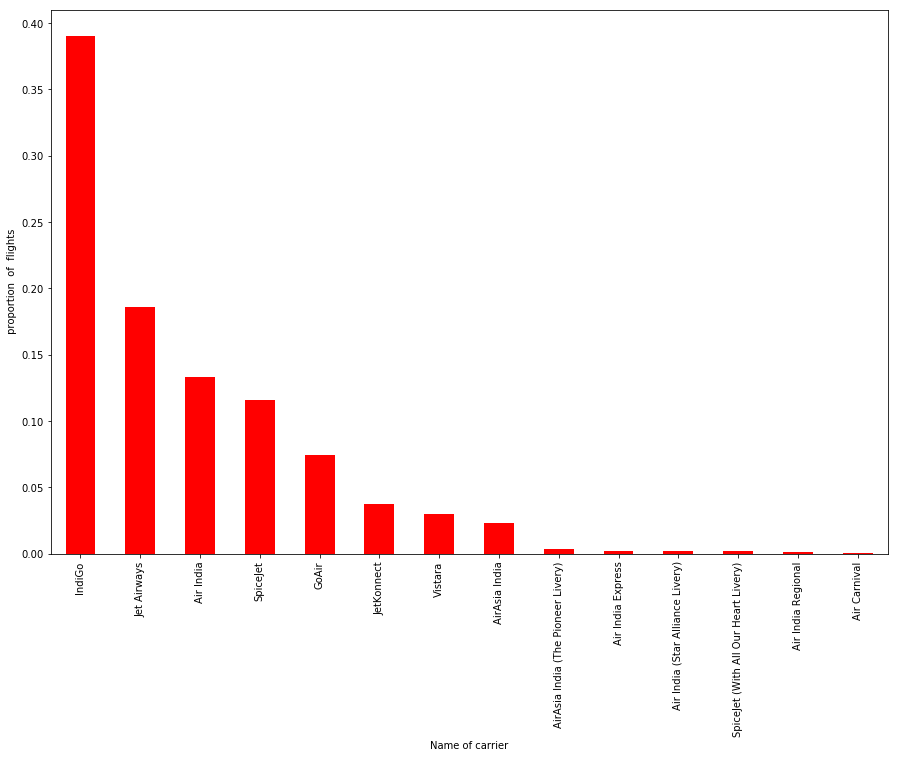

In [107]:
import matplotlib.pyplot as plt 
#%matplotlib inline
qwe.airline_name.value_counts(normalize=True).plot(kind="Bar",figsize=(15,10),color="red")
plt.ylabel(" proportion  of  flights")
plt.xlabel("Name of carrier")
plt.savefig("123.jpeg")

## Distribution of flights by day of the week 

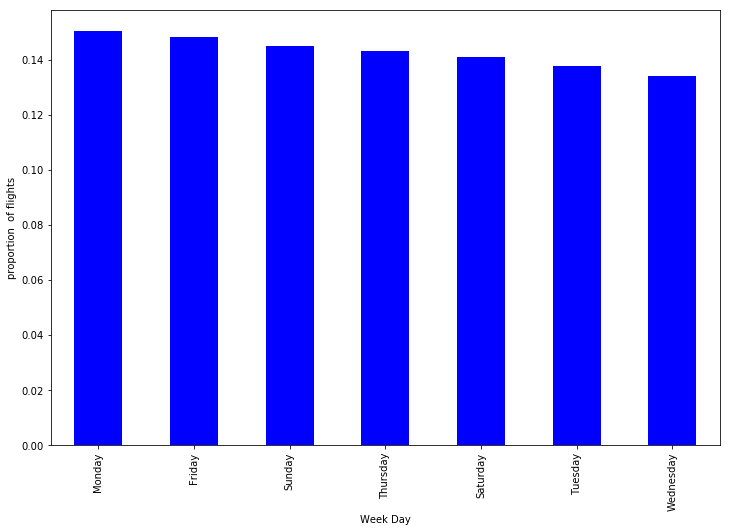

In [108]:
qwe.weekday_dep.value_counts(normalize=True).plot(kind="bar",figsize=(12,8),color="b")
plt.ylabel("proportion  of flights")
plt.xlabel("Week Day")
plt.savefig("1234.jpeg")

## Distribution of flights by ORIGIN Airport 

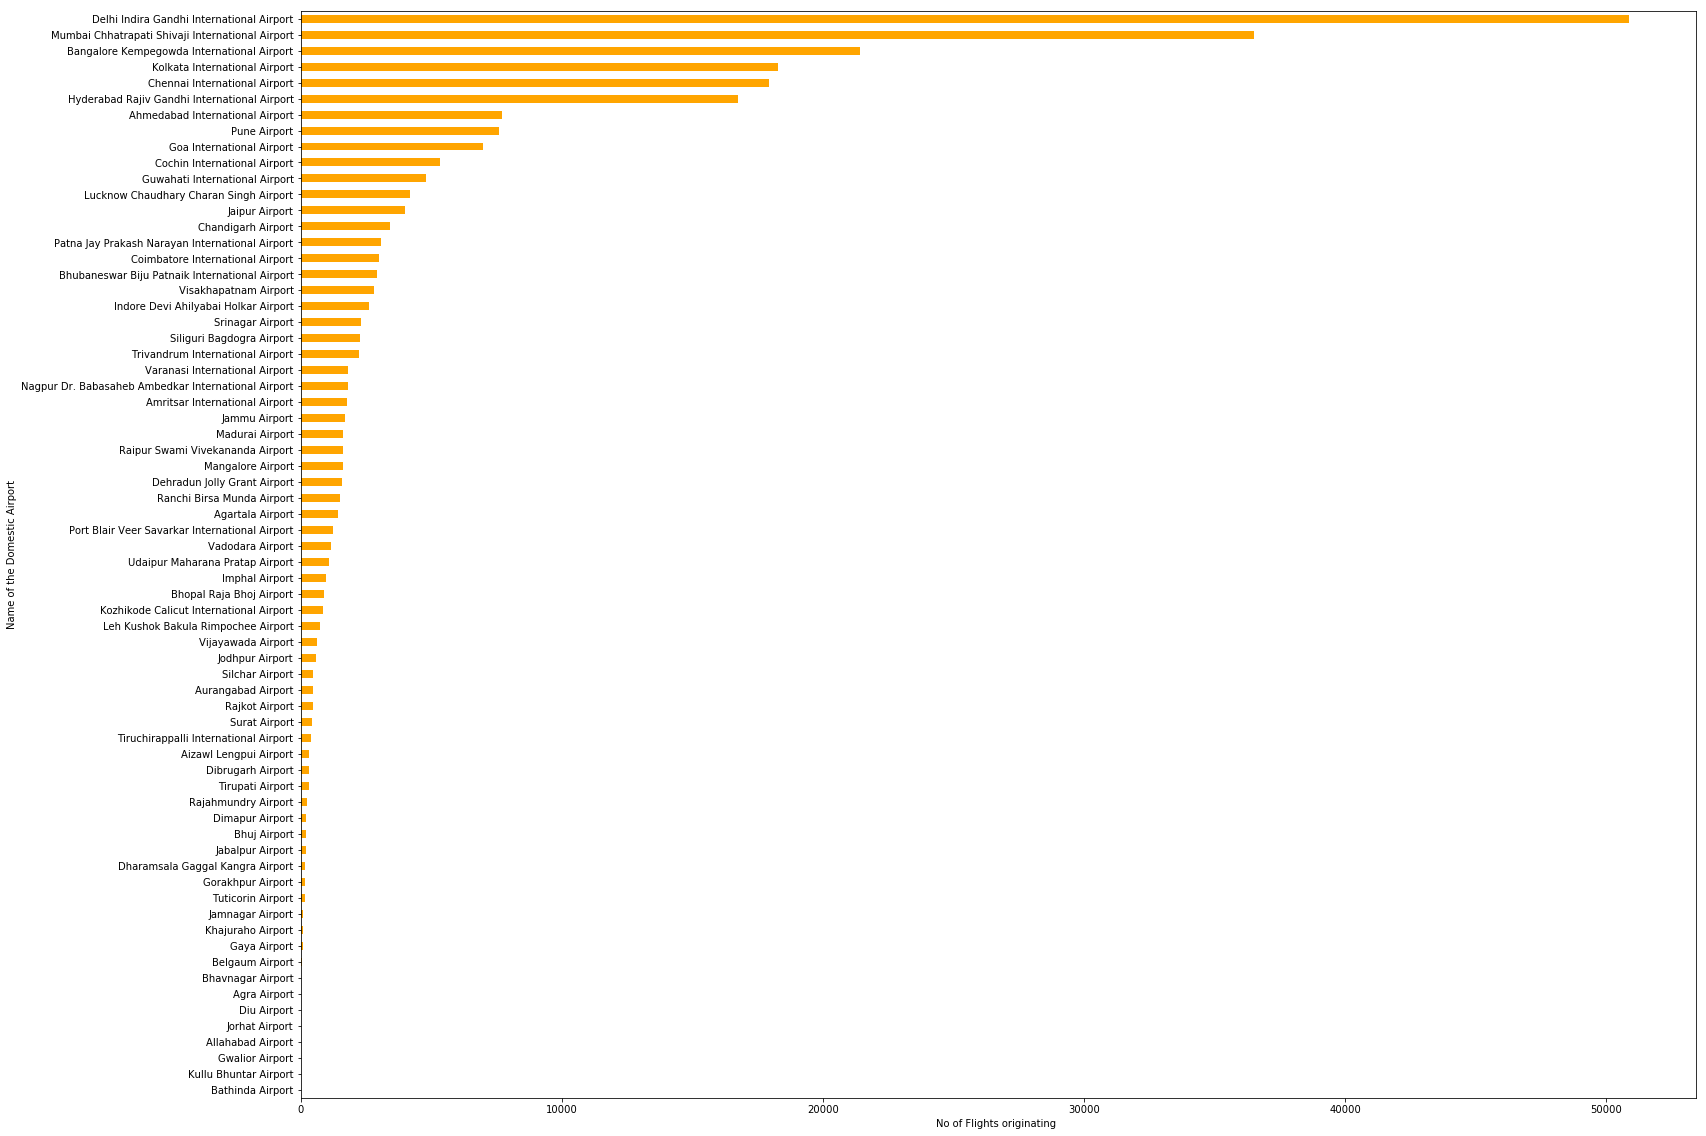

In [140]:
qwe.origin.value_counts(normalize=False,ascending=True).plot(kind="barh",figsize=(25,20),color="orange")
plt.xlabel("No of Flights originating ")
plt.ylabel("Name of the Domestic Airport")
plt.savefig("12345.jpeg")

# Overall descriptive stats

In [38]:
print(qwe["departure_delay"].median())
print(qwe["departure_delay"].mean())
print(qwe["departure_delay"].std())
print(qwe["departure_delay"].quantile(0.955))

13.0
18.06710638065778
25.140649317230935
60.0


## Filtering out delayed flights ( arrival_delay >0 ,60,120)

In [80]:
#filtering out delayed flights,if arrival_delay is greater than 0 , it is considered delayed 

delayed_flights_0_min=qwe[qwe.departure_delay>0]
delayed_flights_60_min=qwe[qwe.departure_delay>60]
delayed_flights_120_min=qwe[qwe.departure_delay>120]
#delayed_flights_0_min.to_csv("delayed_flight_final.csv")

In [82]:
#Printing the shape of delayed flights dataframes


print(delayed_flights_0_min.shape[0]*100/len(qwe))
print(delayed_flights_60_min.shape[0]*100/len(qwe))
print(delayed_flights_120_min.shape[0]*100/len(qwe))


84.6300091163385
4.389088444066978
0.8890377977419531


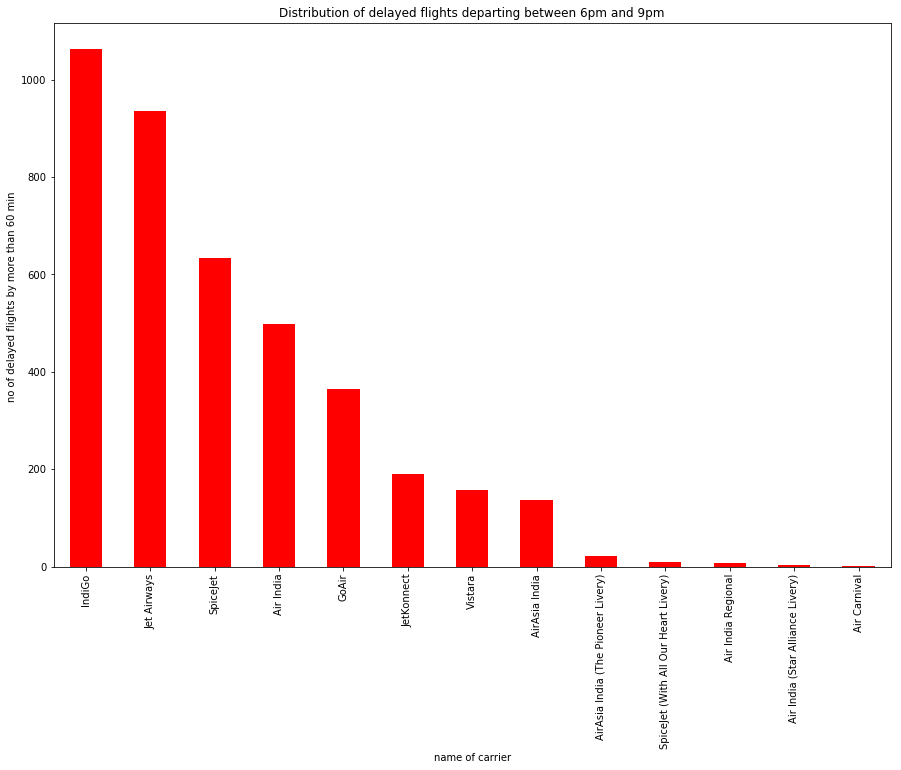

In [132]:
delayed_flights_60_min[(delayed_flights_60_min.hour_dep>=18)& (delayed_flights_60_min.hour_dep<=21)].airline_name.value_counts().plot(figsize=(15,10),color="r",kind="bar")
plt.ylabel("no of delayed flights by more than 60 min ")
plt.xlabel("name of carrier")
plt.title("Distribution of delayed flights departing between 6pm and 9pm")
plt.savefig("123456789.jpeg")

In [137]:
x=delayed_flights_60_min[(delayed_flights_60_min.hour_dep>=18)& (delayed_flights_60_min.hour_dep<=21)].shape[0]/len(delayed_flights_60_min)
print(x)
y=delayed_flights_60_min[(delayed_flights_60_min.hour_dep<=12)].shape[0]/len(delayed_flights_60_min)
print(y)


0.35700337298064977
0.2631812533285993


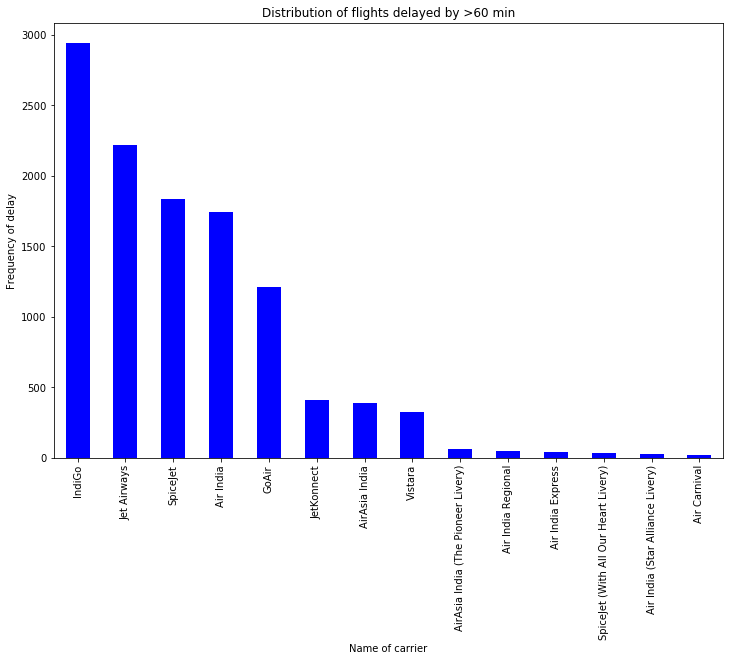

In [112]:
delayed_flights_60_min["airline_name"].value_counts(normalize=False,ascending=False).plot(kind="bar",figsize=(12,8),color="blue")
plt.xlabel("Name of carrier")
plt.ylabel("Frequency of delay")
plt.title("Distribution of flights delayed by >60 min")
plt.savefig("123456.jpeg")

## Distribution of delayed flights by day of the week 

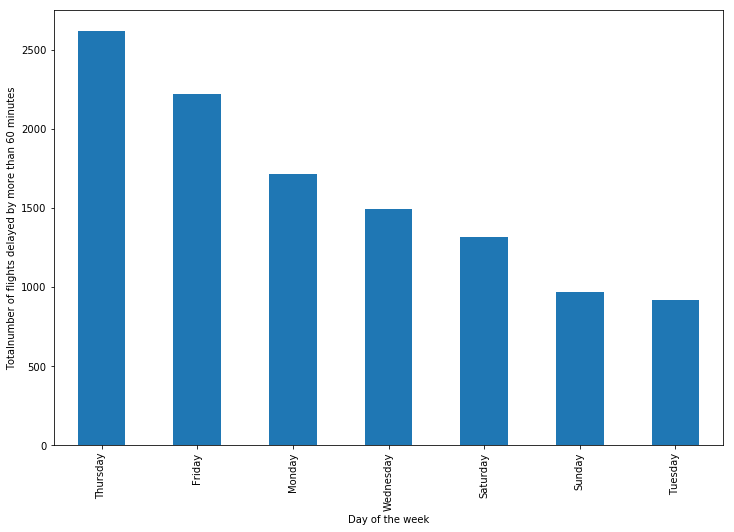

In [113]:
delayed_flights_60_min.weekday_dep.value_counts().plot(figsize=(12,8),kind="bar")
plt.xlabel("Day of the week")
plt.ylabel("Totalnumber of flights delayed by more than 60 minutes")
#plt.yticks(delayed_flights_60_min.weekday_dep.value_counts())
plt.savefig("1234567.jpeg")

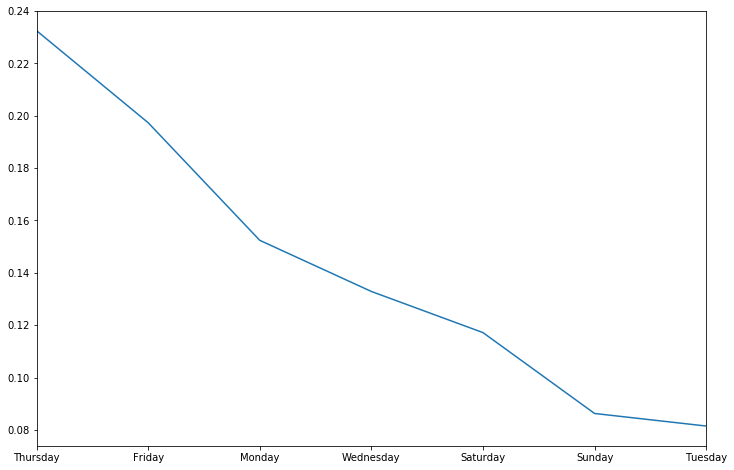

In [102]:
(delayed_flights_60_min.weekday_dep.value_counts()/len(delayed_flights_60_min)).plot(figsize=(12,8))

## Analysing flights delayed by more than zero mins

In [62]:
# importing libraries for plotting 

import matplotlib.pyplot as plt 
%matplotlib inline
del delayed_flights_0_min['timestamp']

In [63]:
# Checking the structure of dataset 

delayed_flights_0_min.head()

,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,...,real_departure,real_arrival,status,duration,distance_travelled,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep
11,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E176,Trivandrum International Airport,Mumbai Chhatrapati Shivaji International Airport,2017-02-28 10:15:00,...,2017-02-28 11:22:52,2017-02-28 13:11:00,Landed 13:11,6517,1252.3895747521426 km,56.0,67.0,10,Tuesday,28
18,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E238,Ahmedabad International Airport,Chennai International Airport,2017-02-27 09:55:00,...,2017-02-27 10:18:32,2017-02-27 12:24:00,Landed 12:24,7564,1371.7036839622774 km,14.0,23.0,9,Monday,27
20,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E238,Kolkata International Airport,Jaipur Airport,2017-02-27 05:20:00,...,2017-02-27 05:23:10,2017-02-27 07:35:00,Landed 07:44,8474,1358.1577783850107 km,10.0,3.0,5,Monday,27
30,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E6493,Bangalore Kempegowda International Airport,Kolkata International Airport,2017-02-25 18:15:00,...,2017-02-25 18:46:18,2017-02-25 20:57:00,Landed 21:00,8076,1544.731830735519 km,17.0,31.0,18,Saturday,25
36,VT-IAL,IndiGo,A320,Airbus A320-232,India,India,6E963,Delhi Indira Gandhi International Airport,Bangalore Kempegowda International Airport,2017-02-24 19:45:00,...,2017-02-24 19:59:29,2017-02-24 22:32:33,Landed 22:32,9184,1702.6538858818212 km,2.0,14.0,19,Friday,24


## Descriptive statistics for "arrival_delay" variable

In [95]:
print("Average arrival delay across all airports when delayed by>0 min :{}".format(delayed_flights_0_min.arrival_delay.mean()))
print("Median arrival delay across all airports when delayed by >0 min:{}".format(delayed_flights_0_min.arrival_delay.median()))
print("Standard deviation of the arrival delay when delayed by >0 min  :{}".format(delayed_flights_0_min.arrival_delay.std()))
print("97th percentile  of the arrival delay when delayed by >0 min  :{}".format(delayed_flights_0_min.arrival_delay.quantile(0.97)))

Average arrival delay across all airports when delayed by>0 min :22.52822790626436
Median arrival delay across all airports when delayed by >0 min:14.0
Standard deviation of the arrival delay when delayed by >0 min  :30.456388013423393
97th percentile  of the arrival delay when delayed by >0 min  :90.0


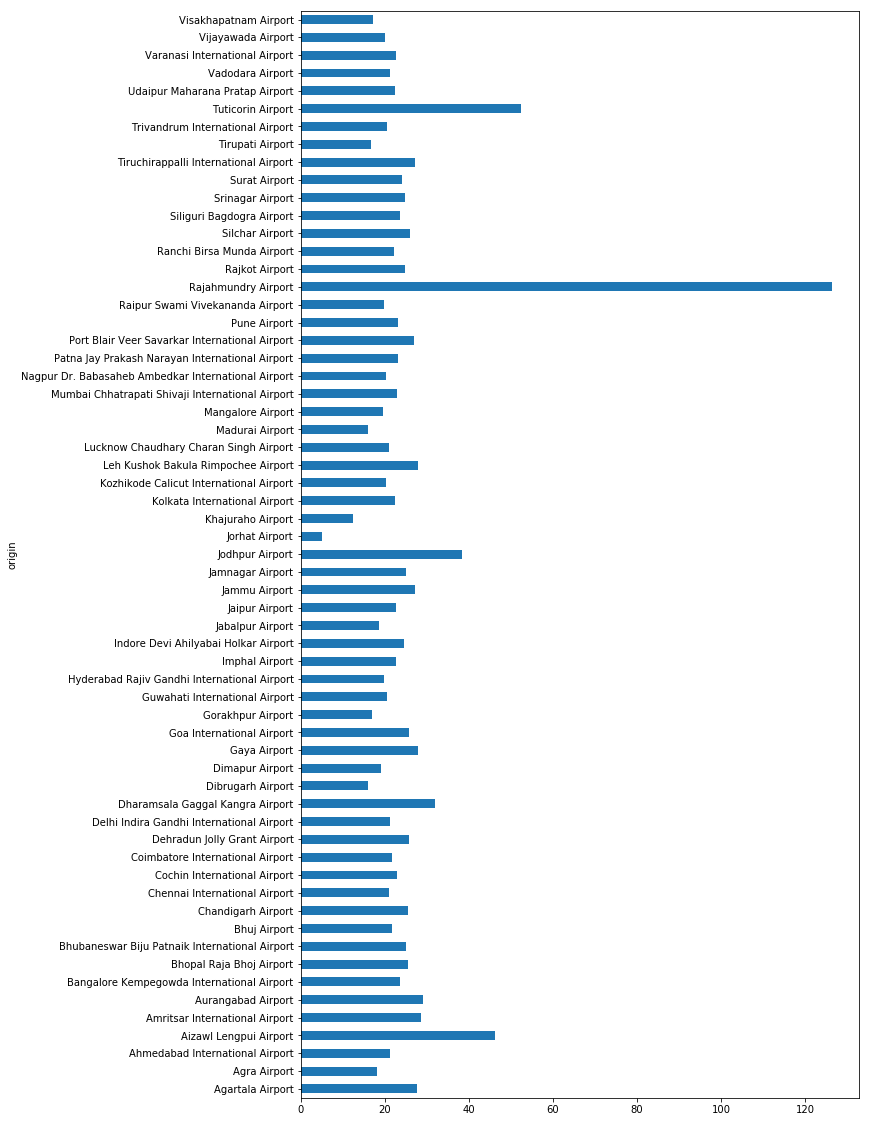

In [36]:
delayed_flights_0_min.groupby("origin").arrival_delay.mean().plot(kind="barh",figsize=(10,20))


# Average arrival delay on hourly basis

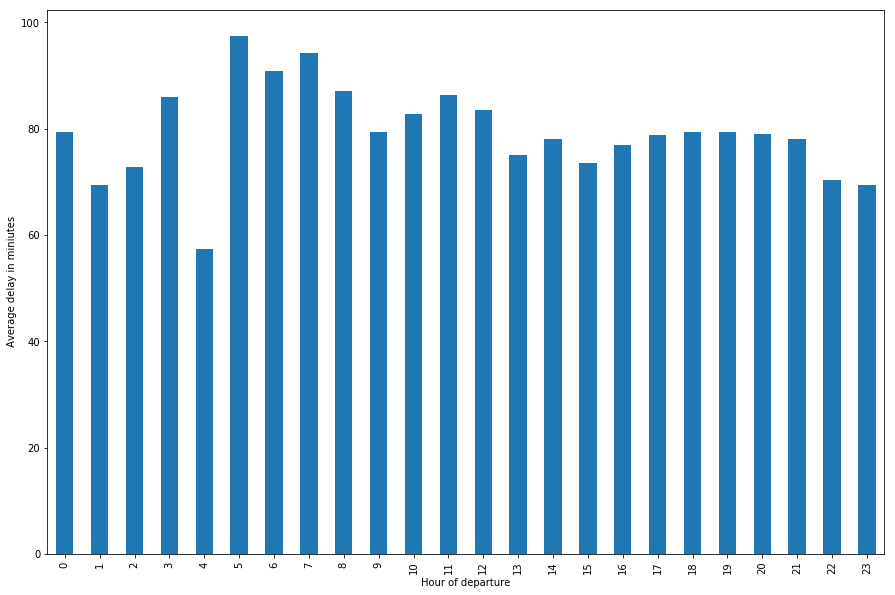

In [114]:
delayed_flights_60_min.groupby("hour_dep").arrival_delay.mean().plot(kind="bar",figsize=(15,10))
plt.xlabel("Hour of departure")
plt.ylabel(" Average delay in miniutes")

# Average arrival delay based on weekdays

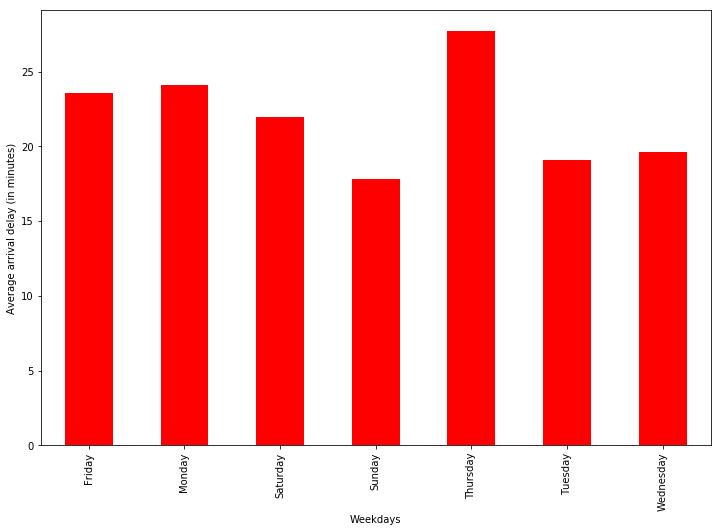

In [46]:
import numpy as np
delayed_flights_0_min.groupby("weekday_dep").arrival_delay.mean().plot(kind="bar",figsize=(12,8),color="r")
plt.ylabel("Average arrival delay (in minutes)")
#plt.yticks(np.array(["Friday","Sataurday","Sunday","Monday","Tuesday","Wednesday","Thursday"]))
plt.xlabel("Weekdays")

In [43]:
delayed_stats=delayed_flights_0_min.groupby('airline_name').arrival_delay.agg(["mean","median"])

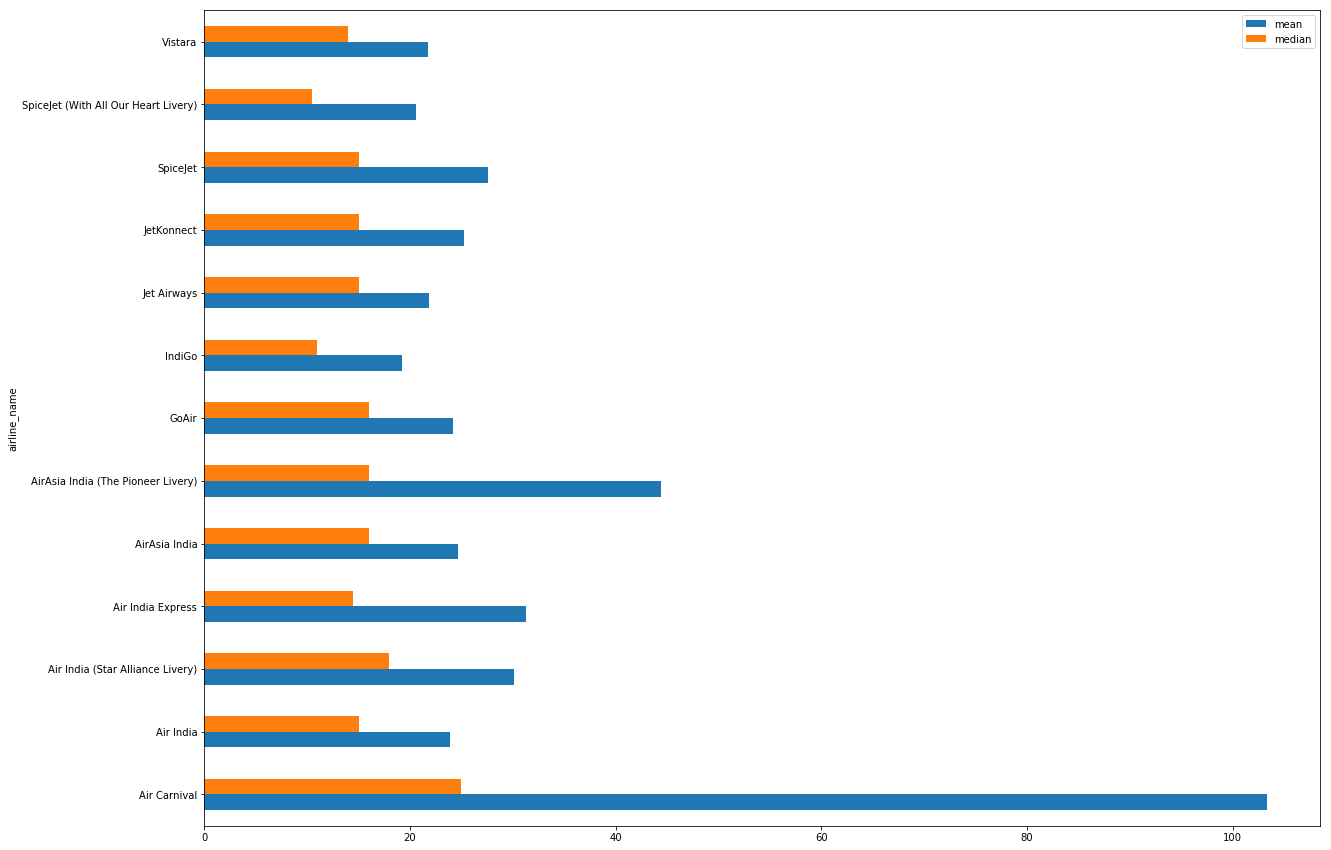

In [44]:

delayed_stats.plot(kind='barh',figsize=(20,15))

### Average delay by  registration number 

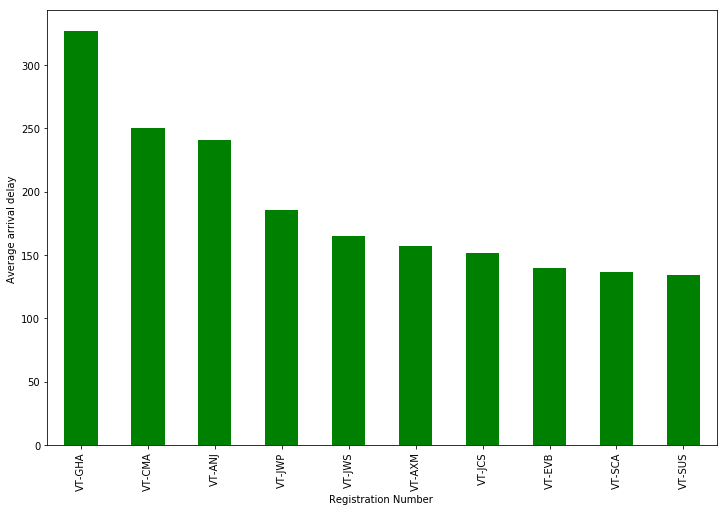

In [115]:
delayed_flights_60_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)[0:10].plot(kind="bar",color="g",
                                                                                                  figsize=(12,8))
plt.xlabel("Registration Number ")
plt.ylabel("Average arrival delay ")

In [118]:
delayed_flights_60_min[delayed_flights_60_min.reg=="VT-AXM"]

,timestamp,reg,airline_name,model,model_text,country_origin,country_dest,flight_number,origin,destination,scheduled_departure,scheduled_arrival,estimated_departure,estimated_arrival,real_departure,real_arrival,status,duration,distance_travelled,geo_coord_origin,geo_coord_dest,arrival_delay,departure_delay,hour_dep,weekday_dep,day_of_month_dep,month
430920,2017-04-03 05:45:06+00:00,VT-AXM,Air India Express,B738,Boeing 737-8HG,India,India,IX544,Cochin International Airport,Trivandrum International Airport,2017-03-31 17:10:00,2017-03-31 18:00:00,None,None,2017-03-31 20:54:44,2017-03-31 21:25:16,Landed 21:25,1860,193.26786639577873 km,"(10.15199, 76.401901)","(8.482122, 76.920113)",205.0,224.0,17,Friday,31,3
430923,2017-04-03 05:45:06+00:00,VT-AXM,Air India Express,B738,Boeing 737-8HG,India,India,IX543,Trivandrum International Airport,Cochin International Airport,2017-03-31 06:05:00,2017-03-31 06:55:00,None,None,2017-03-31 09:22:38,2017-03-31 09:55:01,Landed 09:55,1920,193.26786639577867 km,"(8.482122, 76.920113)","(10.15199, 76.401901)",180.0,197.0,6,Friday,31,3
734436,2017-06-07 06:55:45+00:00,VT-AXM,Air India Express,B738,Boeing 737-8HG,India,India,IX374,Kozhikode Calicut International Airport,Trivandrum International Airport,2017-06-06 22:45:00,2017-06-06 23:45:00,None,None,2017-06-07 00:37:10,2017-06-07 01:12:32,Landed 01:12,2100,312.11884741607355 km,"(11.13683, 75.955299)","(8.482122, 76.920113)",87.0,112.0,22,Tuesday,6,6


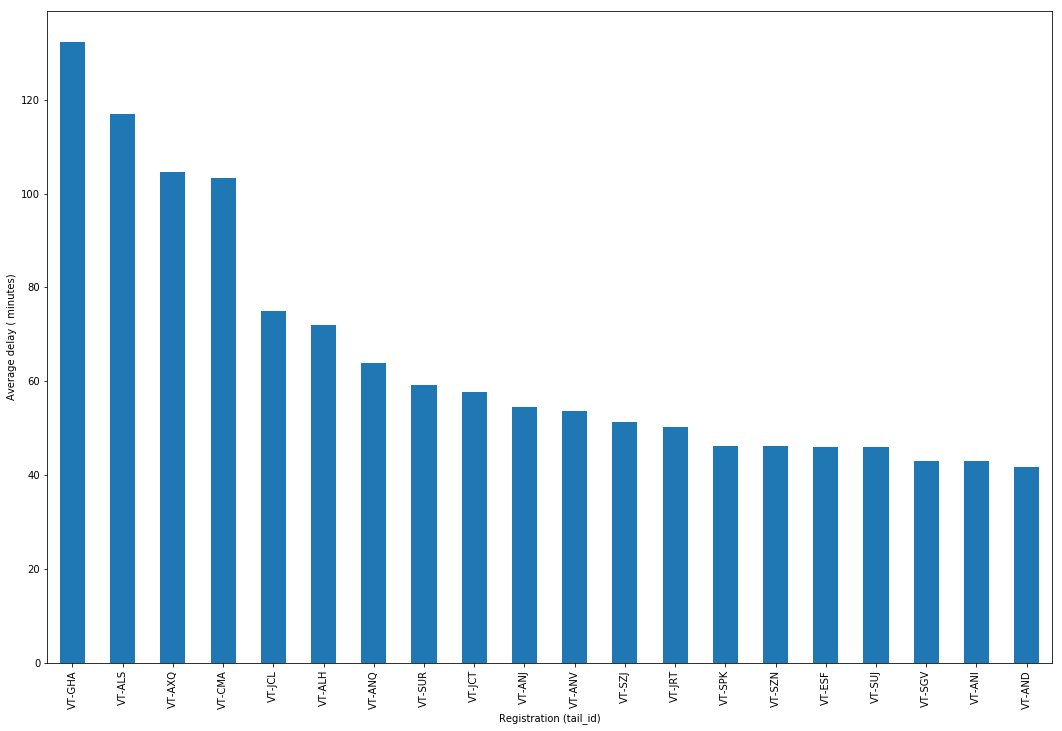

In [45]:
delayed_flights_0_min.groupby("reg").arrival_delay.mean().sort_values(ascending=False)[0:20].plot(kind="bar",figsize=(18,12))
plt.xlabel("Registration (tail_id)")
plt.ylabel("Average delay ( minutes)")

# Distribution of flight delays

### 1.Percentage of flights with  Less than  or equal to 15 minutes delay 

In [47]:
    (delayed_flights_0_min[delayed_flights_0_min.arrival_delay<=15].arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"]))*100

54.6331750650942

### 2.Percentage of  flights with  arrival delay greater than 15 min but less than or equal 30 min

In [48]:
x=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>15][delayed_flights_0_min.arrival_delay<=30]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(x*100)

23.8780824016


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 3. Percentage of flights with arrival delay greater than 30 min  but less than or equal to 60 min

In [50]:
y=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>30][delayed_flights_0_min.arrival_delay<=60]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(y*100)

14.682187165


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 4. Percentage of flights with arrival delay greater than 60 min but less than or equal to 2 hours

In [51]:
z=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>60][delayed_flights_0_min.arrival_delay<=120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(z*100)

5.28411701639


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


### 5.Percentage of  flight with arrival delay greater than 2 hour

In [52]:
p=(delayed_flights_0_min[delayed_flights_0_min.arrival_delay>120]).arrival_delay.count()/len(delayed_flights_0_min["arrival_delay"])
print(p*100)

1.52243835197


In [51]:
q=delayed_flights_0_min.groupby("flight_number").arrival_delay.mean()

In [52]:
type(q)

pandas.core.series.Series

In [53]:
q[q>30].sort_values(ascending=False)[0:5]


flight_number
2S102     268.444444
6E523     238.000000
9W2760    203.000000
G8702     199.666667
SG170     196.500000
Name: arrival_delay, dtype: float64

In [60]:
#print("flight {} flown  {} number of times".format("SG999",new_data[new_data.flight_number=="SG999"].origin.count()))



In [24]:
qwe.shape

(80907, 24)

In [83]:
from bokeh.plotting import figure, output_notebook, show

In [84]:
output_notebook()

Loading BokehJS ...

In [88]:
#p = figure(width=500, height=500)
#p.circle(qwe.origin.value_counts(),qwe.groupby("origin").arrival_delay.mean())
#p.circle(x, y, size=7, color="firebrick", alpha=0.5)
#show(p)

In [54]:
qwe.shape

(80907, 24)

In [25]:
qwe=qwe[qwe.duration!="None"]
qwe=qwe[qwe.flight_number!="None"]
qwe=qwe[qwe.reg!="None"]
qwe=qwe[qwe.origin!="None"]
qwe=qwe[qwe.destination!="None"]
#qwe=qwe[qwe.hour_dep!="None"]
#qwe=qwe[qwe.day_of_month_dep!="None"]
qwe=qwe[qwe.weekday_dep!="None"]
print(qwe.shape)


(80894, 24)


In [26]:
features=qwe[["airline_name","flight_number","origin","destination","hour_dep","day_of_month_dep","weekday_dep"]]

In [27]:
labels=qwe["arrival_delay"]
label=[]
for items in labels:
    if items>60:
        label.append(1)
    else:
        label.append(0)
        
print(len(label))

80894


In [28]:
features_final=pd.get_dummies(features,drop_first=True)


In [29]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import numpy
from sklearn.metrics import accuracy_score


C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(features_final,numpy.array(label),test_size=0.30,random_state=42)

In [31]:
X_train.shape

(56625, 2343)

In [ ]:
Y_train.shape

In [33]:
clf=DecisionTreeClassifier()
clf.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [34]:
pred=clf.predict(X_test)
print(accuracy_score(pred,Y_test))


0.966953726977


In [49]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,fbeta_score
print(confusion_matrix(pred,Y_test))
print(precision_score(pred,Y_test))
print(recall_score(pred,Y_test))
print(fbeta_score(pred,Y_test,beta=0.5))

[[23274   448]
 [  354   193]]
0.301092043682
0.352833638026
0.31018964963


In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune
parameters = {"min_samples_split":[2,3,4,5,6,7,8,9,10]}

# TODO: Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf,param_grid=parameters,scoring=scorer,cv=5)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_fit =grid_obj.fit(X_train,Y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
#print ("Unoptimized model\n------")
#print "Accuracy score on testing data: {:.4f}".format(accuracy_score(Y_test, predictions))
#print "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5))
#print "\nOptimized Model\n------"
#print "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(Y_test, best_predictions))
#print "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5))

C:\Users\Vishal_Oben\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
print(grid_fit.best_estimator_)

In [ ]:

predictions = (clf.fit(X_train, Y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print(accuracy_score(Y_test,best_predictions))

In [ ]:
print(fbeta_score(Y_test,best_predictions,0.5))

In [ ]:
print(precision_score(Y_test,best_predictions))